# Data import

In [0]:
#https://stackabuse.com/understanding-roc-curves-with-python/
#https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn
#https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python?rq=1


import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pandas as pd
import numpy as np
import time

In [16]:
# mount the drive to allow loading of the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
data_red = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML/assignment_week6/input/winequality-red.csv', sep=';')
data_red.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [54]:
data_white = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML/assignment_week6/input/winequality-white.csv', sep=';')
data_white.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

In [105]:
data_red.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
target                  1599
dtype: int64

In [56]:
data_white.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

## Addition of a new target vector

In [0]:
target_list_red = [1] * 1599
data_red = data_red.assign(target = target_list_red)

target_list_white = [0] * 4898
data_white = data_white.assign(target = target_list_white)

data = pd.concat([data_white, data_red], axis=0)

In [0]:
df = data
df = df.drop(columns = ['target'])
target_vector = data.target.values

d = {'target': target_vector}
y = pd.DataFrame(data=d)

# Split into training-set (70%) and test-set (30%)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=42)

# Naïve Bayes classification

## Analysis on training-set (70%) and test-set (30%)


In [136]:
start_time = time.time()

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction= gnb.predict(X_test)

print('Runtime Naïve Bayes: ', (time.time() - start_time))

print('Acuracy: ', accuracy_score(gnb_prediction, y_test))

Runtime Naïve Bayes:  0.012068033218383789
Acuracy:  0.9687179487179487


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
print(classification_report(gnb_prediction, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1458
           1       0.95      0.92      0.94       492

    accuracy                           0.97      1950
   macro avg       0.96      0.95      0.96      1950
weighted avg       0.97      0.97      0.97      1950



In [72]:
cm = confusion_matrix(gnb_prediction, y_test)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Confusion Matrix : 
 [[1435   23]
 [  38  454]]
Accuracy :  0.9687179487179487
Sensitivity :  0.9842249657064472
Specificity :  0.9227642276422764


In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [0]:
#Predict probabilities for the test data
probs = gnb.predict_proba(X_test)

In [0]:
#Probabilities of the positive class only
probs = probs[:, 1]

In [77]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.98


In [0]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

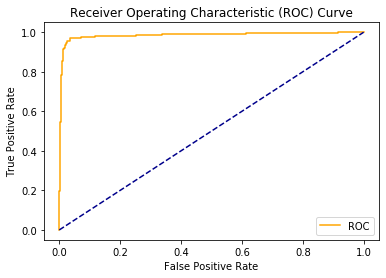

In [79]:
plot_roc_curve(fpr, tpr)

## 5-fold cross-validation

In [133]:
score_gnb = cross_val_score(gnb, df, y, cv=5)
print("Accuracy: %.2f%%" % (score_gnb.mean()*100.0))                                           

Accuracy: 96.91%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Leave-one-out cross-validation

In [0]:
target_array = y.target.values
loocv = LeaveOneOut()

score_loocv = cross_val_score(gnb, df, target_array, cv=loocv)
print("Accuracy: %.2f%%" % (score_loocv.mean()*100.0))

Accuracy: 97.09%


## Different noise levels

In [0]:
clean_signal = df
mu_1, sigma_1 = 0, 0.1 
noise_10 = np.random.normal(mu_1, sigma_1)
signal_10 = clean_signal + noise_10

mu_2, sigma_2 = 0, 0.2 
noise_20 = np.random.normal(mu_2, sigma_2)
signal_20 = clean_signal + noise_20

mu_3, sigma_3 = 0, 0.3 
noise_30 = np.random.normal(mu_3, sigma_3)
signal_30 = clean_signal + noise_30

In [82]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(signal_10, y, test_size=0.30, random_state=42)
gnb_1 = GaussianNB()
gnb_1.fit(X_train_1, y_train_1)
gnb_prediction_1= gnb_1.predict(X_test_1)
print(classification_report(gnb_prediction_1, y_test_1))

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(signal_20, y, test_size=0.30, random_state=42)
gnb_2 = GaussianNB()
gnb_2.fit(X_train_2, y_train_2)
gnb_prediction_2= gnb_2.predict(X_test_2)
print(classification_report(gnb_prediction_2, y_test_2))

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(signal_30, y, test_size=0.30, random_state=42)
gnb_3 = GaussianNB()
gnb_3.fit(X_train_3, y_train_3)
gnb_prediction_3= gnb_1.predict(X_test_3)
print(classification_report(gnb_prediction_3, y_test_3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1458
           1       0.95      0.92      0.94       492

    accuracy                           0.97      1950
   macro avg       0.96      0.95      0.96      1950
weighted avg       0.97      0.97      0.97      1950

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1458
           1       0.95      0.92      0.94       492

    accuracy                           0.97      1950
   macro avg       0.96      0.95      0.96      1950
weighted avg       0.97      0.97      0.97      1950

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1950
           1       0.00      0.00      0.00         0

    accuracy                           0.76      1950
   macro avg       0.50      0.38      0.43      1950
weighted avg       1.00      0.76      0.86      1950



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', averag

## Correlation analysis

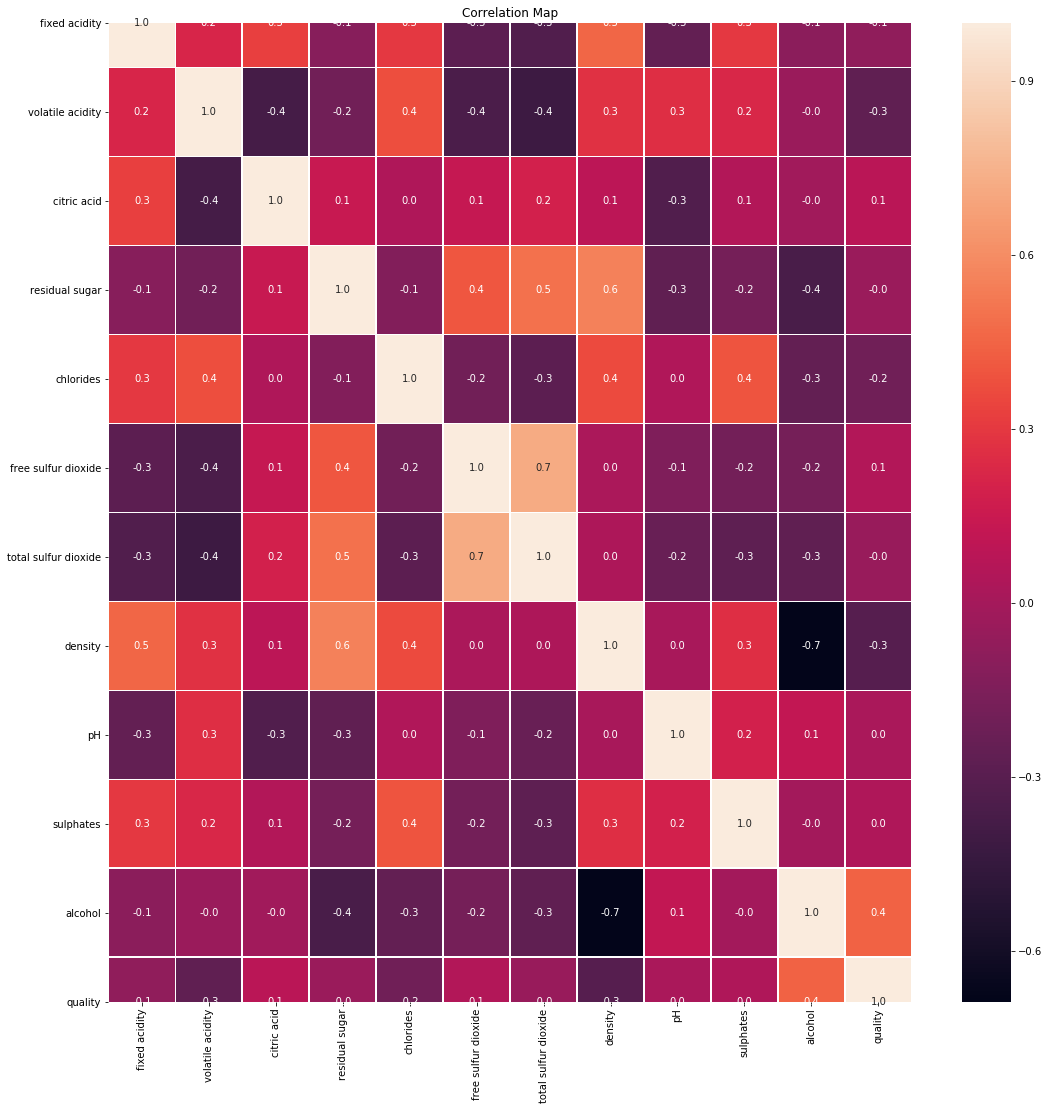

In [93]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

# K-nearest Neighbors

## Determine the best value for k using cross-validation

In [113]:
k_range = range(1, 12)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, df, target_vector, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print('Max of list', max(k_scores))

Max of list 0.9398207645043805


In [100]:
print(k_scores)

[0.9304290331973949, 0.9358195821755144, 0.9339727127862721, 0.935819341466234, 0.9395116484269026, 0.9388965008626025, 0.9378202896705721, 0.9384354379665112, 0.9398207645043805, 0.9390524834027658, 0.9396678665548723]


Text(0, 0.5, 'Cross-validated accuracy')

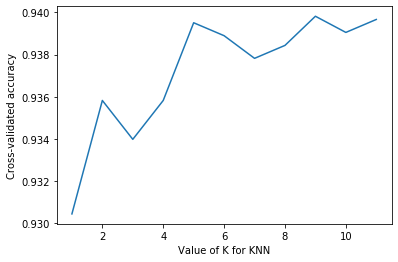

In [99]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

## Analysis on training-set (70%) and test-set (30%) with k=9

In [137]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=9) #best k
knn.fit(X_train, y_train) 
knn_prediction = knn.predict(X_test)

print('Runtime KNN: ', (time.time() - start_time))

print('Accuracy: ', knn.score(X_test, y_test)) 

Runtime KNN:  0.1002347469329834
Accuracy:  0.9348717948717948


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [123]:
cm = confusion_matrix(knn_prediction, y_test)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Confusion Matrix : 
 [[1431   88]
 [  42  389]]
Accuracy :  0.9333333333333333
Sensitivity :  0.9420671494404214
Specificity :  0.9025522041763341


In [0]:
#Predict probabilities for the test data
probs = knn.predict_proba(X_test)

In [0]:
#Probabilities of the positive class only
probs = probs[:, 1]

In [126]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.96


In [0]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

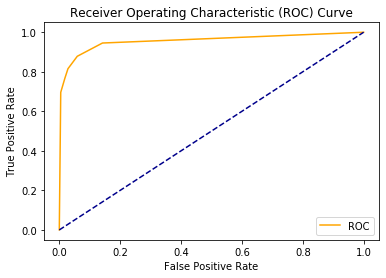

In [128]:
plot_roc_curve(fpr, tpr)

In [109]:
print(classification_report(knn_prediction, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1524
           1       0.81      0.91      0.86       426

    accuracy                           0.93      1950
   macro avg       0.89      0.93      0.91      1950
weighted avg       0.94      0.93      0.94      1950



## 5-fold cross-validation

In [103]:
score_knn = cross_val_score(knn, df, target_vector, cv=5)
print("Accuracy: %.2f%%" % (score_knn.mean()*100.0))     

Accuracy: 93.80%


## Leave-one-out cross-validation

In [106]:
score_loocv = cross_val_score(knn, df, target_vector, cv=loocv)
print("Accuracy: %.2f%%" % (score_loocv.mean()*100.0))

Accuracy: 94.26%


## Different noise levels (10%, 20%, 30%)

In [131]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(signal_10, y, test_size=0.30, random_state=42)
knn_1 = KNeighborsClassifier(n_neighbors=9)
knn_1.fit(X_train_1, y_train_1)
knn_prediction_1= knn_1.predict(X_test_1)
print(classification_report(knn_prediction_1, y_test_1))

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(signal_20, y, test_size=0.30, random_state=42)
knn_2 = KNeighborsClassifier(n_neighbors=9)
knn_2.fit(X_train_2, y_train_2)
knn_prediction_2= knn_2.predict(X_test_2)
print(classification_report(knn_prediction_2, y_test_2))

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(signal_30, y, test_size=0.30, random_state=42)
knn_3 = KNeighborsClassifier(n_neighbors=9)
knn_3.fit(X_train_3, y_train_3)
knn_prediction_3= knn_1.predict(X_test_3)
print(classification_report(knn_prediction_3, y_test_3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1524
           1       0.81      0.91      0.86       426

    accuracy                           0.93      1950
   macro avg       0.89      0.93      0.91      1950
weighted avg       0.94      0.93      0.94      1950

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1524
           1       0.81      0.91      0.86       426

    accuracy                           0.93      1950
   macro avg       0.89      0.93      0.91      1950
weighted avg       0.94      0.93      0.94      1950

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1529
           1       0.81      0.92      0.86       421

    accuracy                           0.94      1950
   macro avg       0.89      0.93      0.91      1950
weighted avg       0.94      0.94      0.94      1950



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


# Runtime comparison of KNN and Naive Bayes

### Creation of larger dataset

In [0]:
data_2 = pd.concat([data, data], axis=0) #12994 entries
data_3 = pd.concat([data_2, data_2], axis=0) #25988
data_4 = pd.concat([data_3, data_3], axis=0) #51976
data_5 = pd.concat([data_4, data_4], axis=0) #103952

In [0]:
df1 = data
df1 = df1.drop(columns = ['target'])
target_vector_1 = data.target.values
d = {'target': target_vector_1}
y1 = pd.DataFrame(data=d)

df2 = data_2
df2 = df2.drop(columns = ['target'])
target_vector_2 = data_2.target.values
d = {'target': target_vector_2}
y2 = pd.DataFrame(data=d)

df3 = data_3
df3 = df3.drop(columns = ['target'])
target_vector_3 = data_3.target.values
d = {'target': target_vector_3}
y3 = pd.DataFrame(data=d)

df4 = data_4
df4 = df4.drop(columns = ['target'])
target_vector_4 = data_4.target.values
d = {'target': target_vector_4}
y4 = pd.DataFrame(data=d)

df5 = data_5
df5 = df5.drop(columns = ['target'])
target_vector_5 = data_5.target.values
d = {'target': target_vector_5}
y5 = pd.DataFrame(data=d)

In [141]:
df_list = [df1, df2, df3, df4, df5]
y_list = [y1, y2, y3, y4, y5]
n = [6497, 12994, 25988, 51976, 103952]
nb_runtime = []
knn_runtime = []

for i in range(0, len(df_list)):

  X_train, X_test, y_train, y_test = train_test_split(df_list[i], y_list[i], test_size=0.30, random_state=42)

  start_time = time.time()
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  gnb_prediction= gnb.predict(X_test)
  nb_rt = time.time() - start_time
  nb_runtime.append(nb_rt)

  start_time = time.time()
  knn = KNeighborsClassifier(n_neighbors=9) #best k
  knn.fit(X_train, y_train) 
  knn_prediction = knn.predict(X_test)
  knn_rt = time.time() - start_time
  knn_runtime.append(knn_rt)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packag

In [147]:
print('NB: ', nb_runtime)
print('KNN: ', knn_runtime)


NB:  [0.008309602737426758, 0.00957345962524414, 0.013149499893188477, 0.027821779251098633, 0.04700946807861328]
KNN:  [0.09538388252258301, 0.2128605842590332, 0.4090898036956787, 0.7818813323974609, 1.479344367980957]


Text(0, 0.5, 'Runtime (sec)')

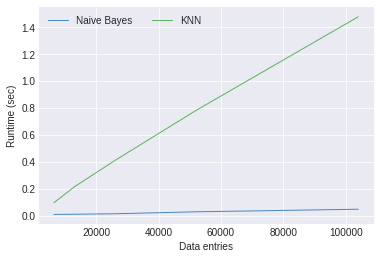

In [146]:
# libraries and data
import matplotlib.pyplot as plt

# Make a data frame
df=pd.DataFrame({'x': n, 'Naive Bayes': nb_runtime, 'KNN': knn_runtime })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
  num+=1
  plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.xlabel("Data entries")
plt.ylabel("Runtime (sec)")
